In [ ]:
!git clone https://github.com/stanfordnlp/glove


In [21]:
%cd glove 

/content/glove


In [24]:
!make

mkdir -p build


In [26]:
!./demo.sh

mkdir -p build
--2021-02-15 09:36:06--  http://mattmahoney.net/dc/text8.zip
Resolving mattmahoney.net (mattmahoney.net)... 67.195.197.24
Connecting to mattmahoney.net (mattmahoney.net)|67.195.197.24|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31344016 (30M) [application/zip]
Saving to: ‘text8.zip’

text8.zip           100%[===================>]  29.89M   821KB/s    in 38s     

2021-02-15 09:36:44 (806 KB/s) - ‘text8.zip’ saved [31344016/31344016]

Archive:  text8.zip
  inflating: text8                   

$ build/vocab_count -min-count 5 -verbose 2 < text8 > vocab.txt
BUILDING VOCABULARY
Processed 0 tokens.100000 tokens.200000 tokens.300000 tokens.400000 tokens.500000 tokens.600000 tokens.700000 tokens.800000 tokens.900000 tokens.1000000 tokens.1100000 tokens.1200000 tokens.1300000 tokens.1400000 tokens.1500000 tokens.1600000 tokens.1700000 tokens.1800000 tokens.1900000 tokens.2000000 tokens.2100000 tokens.2200000 tokens.2300000 tokens.2400000 tokens.25000

In [29]:
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

glove_file = "/content/glove/vectors.txt"
tmp_file = get_tmpfile("vectors-word2vec.txt")
_ = glove2word2vec(glove_file, tmp_file)
model = KeyedVectors.load_word2vec_format(tmp_file)
model.vocab
model.save('model_glove.bin')

In [30]:
model.most_similar('the')

[('which', 0.8709301352500916),
 ('first', 0.8447054028511047),
 ('in', 0.8423375487327576),
 ('its', 0.8394200801849365),
 ('this', 0.8346841931343079),
 ('as', 0.8280278444290161),
 ('part', 0.8158630728721619),
 ('second', 0.8084254264831543),
 ('of', 0.8011647462844849),
 ('only', 0.7898983955383301)]

In [31]:
model.most_similar('excess')

[('mortality', 0.724179744720459),
 ('excessive', 0.6306768655776978),
 ('increase', 0.6260769367218018),
 ('heat', 0.6232826709747314),
 ('rate', 0.6155470013618469),
 ('starvation', 0.6136971712112427),
 ('causing', 0.6125214695930481),
 ('increases', 0.6057778596878052),
 ('amount', 0.6055707931518555),
 ('reduces', 0.6032126545906067)]

In [34]:
lst= ['the', 'excess', 'for', 'hello', 'just', 'therefore']
most_similar_cbow = [model.wv.most_similar(i) for i in lst]
for i in most_similar_cbow:
  print(i)

[('which', 0.8709301352500916), ('first', 0.8447054028511047), ('in', 0.8423375487327576), ('its', 0.8394200801849365), ('this', 0.8346841931343079), ('as', 0.8280278444290161), ('part', 0.8158630728721619), ('second', 0.8084254264831543), ('of', 0.8011647462844849), ('only', 0.7898983955383301)]
[('mortality', 0.724179744720459), ('excessive', 0.6306768655776978), ('increase', 0.6260769367218018), ('heat', 0.6232826709747314), ('rate', 0.6155470013618469), ('starvation', 0.6136971712112427), ('causing', 0.6125214695930481), ('increases', 0.6057778596878052), ('amount', 0.6055707931518555), ('reduces', 0.6032126545906067)]
[('as', 0.840674638748169), ('use', 0.8197919130325317), ('only', 0.8132235407829285), ('while', 0.7975343465805054), ('making', 0.7928705215454102), ('provided', 0.7898003458976746), ('example', 0.7886114120483398), ('also', 0.7878153324127197), ('well', 0.7875826358795166), ('such', 0.7867199182510376)]
[('bye', 0.5968818068504333), ('nasty', 0.5752360820770264), (

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


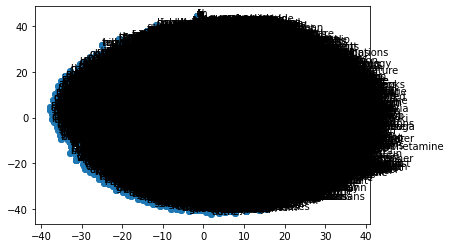

In [37]:
# Import required libraries
import numpy as np
import pandas as pd 
import nltk
from gensim.models import Word2Vec, KeyedVectors, word2vec
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import gensim
%matplotlib inline

def tsneGraph(model):
  X = model[model.wv.vocab]
  tsne = TSNE(n_components=2)
  result = tsne.fit_transform(X)
  # create a scatter plot of the projection
  plt.scatter(result[:, 0], result[:, 1])
  words = list(model.wv.vocab)
  for i, word in enumerate(words):
  	plt.annotate(word, xy=(result[i, 0], result[i, 1]))
  plt.show()

tsneGraph(model)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  if __name__ == '__main__':


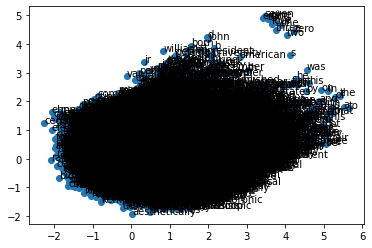

In [40]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  if sys.path[0] == '':


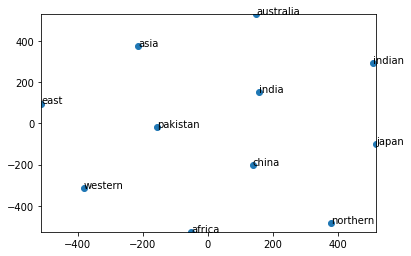

In [44]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def display_closestwords_tsnescatterplot(model, word, size):
  arr = np.empty((0,size), dtype='f')
  word_labels = [word]

  close_words = model.similar_by_word(word)
  arr = np.append(arr, np.array([model[word]]), axis=0)
  for wrd_score in close_words:
    wrd_vector = model.wv.__getitem__([wrd_score[0]])
    word_labels.append(wrd_score[0])
    arr = np.append(arr, wrd_vector, axis=0)

  tsne = TSNE(n_components = 2, random_state=0)
  np.set_printoptions(suppress=True)
  Y = tsne.fit_transform(arr)

  x_coords = Y[:, 0]
  y_coords = Y[:, 1]
  plt.scatter(x_coords, y_coords)

  for label, x, y in zip(word_labels, x_coords, y_coords):
    plt.annotate(label, xy=(x,y), xytext=(0,0), textcoords='offset points')

  plt.xlim(x_coords.min()+0.00005,x_coords.max()+0.00005 )
  plt.ylim(y_coords.min()+0.00005,y_coords.max()+0.00005 )
  plt.show()

display_closestwords_tsnescatterplot(model, 'india', 50)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """


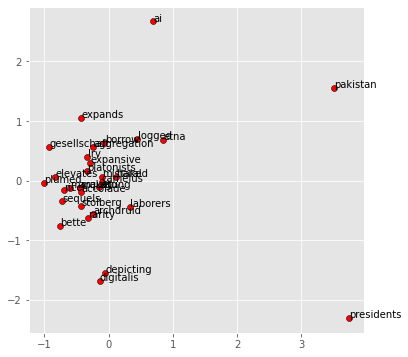

In [69]:
plt.style.use('ggplot')
def display_pca_scatterplot(model, words=None, sample=0):
  if words==None:
    if sample > 0:
      words = np.random.choice(list(model.wv.vocab), sample)
    else:
      words = [word for word in model.wv.vocab]

    word_vectors = np.array([model[w] for w in words])
    twodium = PCA().fit_transform(word_vectors)[:,:2]

    plt.figure(figsize=(6,6))
    plt.scatter(twodium[:,0], twodium[:,1], edgecolors='k', c='r')

    for word, (x,y) in zip(words, twodium):
      plt.text(x+0.005, y+0.005, word)
    plt.show()

display_pca_scatterplot(model, sample=30)